In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
## pca

In [105]:
df=pd.read_csv(r"C:\Users\Ramesh\Downloads\iris (1).csv")

In [135]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,14,1.4,0.2,setosa
1,4.9,9,1.4,0.2,setosa
2,4.7,11,1.3,0.2,setosa
3,4.6,10,1.5,0.2,setosa
4,5.0,15,1.4,0.2,setosa


In [107]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [108]:
df.shape

(150, 5)

In [109]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [110]:
df.shape

(150, 5)

In [111]:
df.data=df.iloc[:,1:3]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [112]:
df.data.head()

,Sepal.Width,Petal.Length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [113]:
from sklearn import preprocessing
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


In [114]:
label_encoder=preprocessing.LabelEncoder()
df['Sepal.Width']=label_encoder.fit_transform(df['Sepal.Width'])
df['Sepal.Width'].unique()

array([14,  9, 11, 10, 15, 18, 13,  8, 16, 19, 22, 17, 12, 20, 21,  2,  7,
        3,  6,  0,  1,  4,  5], dtype=int64)

In [115]:
df_normal=scale(df.data)
type(df_normal)

numpy.ndarray

In [116]:
df_normal1=pd.DataFrame(df_normal)
df_normal1.head()
type(df_normal1)

pandas.core.frame.DataFrame

In [117]:
pcs=PCA()
pca_values=PCA().fit_transform(df_normal1)
pca_values=pcs.fit_transform(df_normal1)

In [118]:
type(pca_values)

numpy.ndarray

In [119]:
var=pcs.explained_variance_ratio_
var

array([0.71422005, 0.28577995])

In [120]:
(pcs.components_)
pccomp=pd.DataFrame(pcs.components_)
pccomp

,0,1
0,0.707107,-0.707107
1,0.707107,0.707107


In [121]:
var

array([0.71422005, 0.28577995])

In [122]:
cumvar=np.cumsum(np.round(var,decimals=4)*100)
cumvar

array([ 71.42, 100.  ])

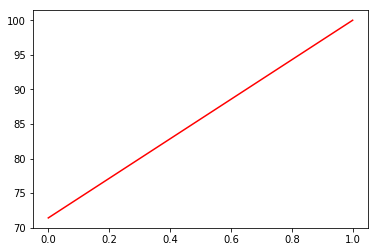

In [123]:
plt.plot(cumvar,color="red")
plt.show()

In [124]:
type(pca_values)
pcs=pd.DataFrame(pca_values)
pcs

,0,1
0,1.668228,-0.227138
1,0.854360,-1.041007
2,1.220097,-0.755650
3,0.976943,-0.838043
4,1.831002,-0.064365
5,2.198753,0.544527
6,1.505454,-0.389912
7,1.465264,-0.349722
8,0.691586,-1.203781
9,0.976943,-0.838043


In [ ]:
## clustering

In [125]:
new_df=pd.DataFrame(pca_values[:,0:3])
new_df.head()

,0,1
0,1.668228,-0.227138
1,0.854360,-1.041007
2,1.220097,-0.755650
3,0.976943,-0.838043
4,1.831002,-0.064365


In [ ]:
## kmeans

In [126]:
from sklearn.cluster import KMeans

In [127]:
m1=KMeans(n_clusters=4)
m1.fit(new_df)
m1.labels_

array([3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 0, 3, 3,
       1, 3, 1, 3, 1, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2])

In [128]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,14,1.4,0.2,setosa
1,4.9,9,1.4,0.2,setosa
2,4.7,11,1.3,0.2,setosa
3,4.6,10,1.5,0.2,setosa
4,5.0,15,1.4,0.2,setosa


In [129]:
x= df.iloc[:,[1,2]].values

In [130]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss
    

[3249.0187333333333,
 1410.6326838235295,
 835.0090966420967,
 610.7561019751082,
 448.51167023824917,
 338.2321832690246,
 263.3067257727653,
 211.4990551378446,
 173.36846188387636,
 141.19467384125537]

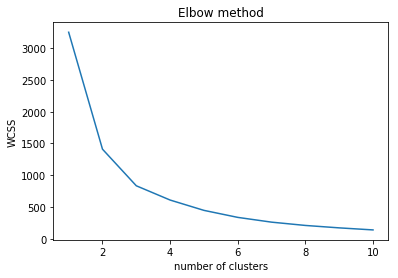

In [131]:
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [132]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x)

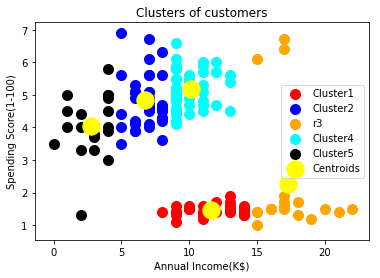

In [134]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='orange',label='r3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='black',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [ ]:
## knn

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import scale

In [80]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,14,1.4,0.2,setosa
1,4.9,9,1.4,0.2,setosa
2,4.7,11,1.3,0.2,setosa
3,4.6,10,1.5,0.2,setosa
4,5.0,15,1.4,0.2,setosa


In [81]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [82]:
df.iloc[:,0:4].astype(int).head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5,14,1,0
1,4,9,1,0
2,4,11,1,0
3,4,10,1,0
4,5,15,1,0


In [83]:
x=df.loc[:,['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=df.loc[:,'Species']

In [84]:
X=scale(x)

In [85]:
X

array([[-9.00681170e-01,  1.02738628e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.33065091e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.31115458e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.90251837e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.25947656e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.95574738e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.95296007e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.95296007e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.65155365e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.90251837e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.49156683e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.95296007e-01, -1.22655167e+00,
      

In [86]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [87]:
y_test.head()

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
Name: Species, dtype: object

In [88]:
knn=KNeighborsClassifier(n_neighbors=10,metric='euclidean')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [89]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [90]:
y_predict=knn.predict(x_test)
np.mean(y_predict == y_test)



1.0

In [91]:
confusion_matrix(y_predict,y_test)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [92]:
accuracy_score(y_predict,y_test)

1.0

In [93]:
y_predict1=knn.predict(x_test)
np.mean(y_predict1==y_test)

1.0

In [94]:
accuracy_score(y_test,y_predict1)

1.0

In [95]:
confusion_matrix(y_test,y_predict1)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [96]:
np.mean(y_test==y_predict1)

1.0